In [12]:
# !pip install matplotlib

In [7]:
# 기분 텍스트를 빈도 수로 추출

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
#시각화 결과가 선명하게 표시되도록
%config InlindBackend.figure_format = 'retina'


In [8]:
# 윈도우 한글폰트 설정
plt.rc("font", family="Malgun Gothic")
# mac 한글폰트 설정
# plt.rc("font", family="AppleGothic")
plt.rc('axes', unicode_minus=False)

In [10]:
# 크롤링한 파일 로드하기
# df = pd.read_csv("./textdata/신나는음악.csv", encoding='euc-kr')
df = pd.read_csv("../youtube_text_crowl/textdata/최종정제/done.csv")
df.shape

(4611, 3)

In [11]:
df.head()

,Unnamed: 0,id,comment
0,0,@prollymiss4953,"제가 제일 좋아하는 때껄룩님 플리로 시작하네요 ,, ♡ 요즘 학업이 너무 힘들고 많..."
1,1,@thedailyvibe247,This playlist is the perfect accompaniment for...
2,2,@TokyoChill87,Billions of people.. yet we're still alone lis...
3,3,@cloverfield-,I’m sitting outside at the recovery home I’m a...
4,4,@user-vw4rn7vt7z,역시 떼껄룩 레전드는 드라이브임.. 몇년이 지나도 드라이브 플리 노래들은 꼭꼭 듣는...


In [12]:
# 데이터 전처리
# 네트워크 오류 등으로 발생한 중복 입력값을 제거
# 빈도 수 중복 방지

print(df.shape)
df = df.drop_duplicates(['comment'], keep="last")
print(df.shape)

(4611, 3)
(4611, 3)


In [13]:
df = df.dropna(subset=['comment'], how='any', axis=0)

In [14]:
# 원본 보존
df['origin_comment'] = df["comment"]

In [15]:
# 소문자 변환
df["comment"] = df["comment"].str.lower()

In [16]:
# 같은 의미의 단어를 하나로 통일 ex. python -> 파이썬
df['comment'] = df['comment'].str.replace(
    "좋아요", "좋다")

In [29]:
# 키워드 추출
search_keyword = ['슬픔', '즐거워','좋아','즐겁게','신나','신나요','우울','우울해','죽고싶어','힘들어','힘들다']

for keyword in search_keyword:
    df[keyword] = df["comment"].str.contains(keyword)
    

In [30]:
df.drop(['id'], axis=1)
# 

,Unnamed: 0,comment,origin_comment,좋아요,즐거워,좋아,즐겁게,신나,신나요,우울,우울해,죽고싶을 때,힘들어,힘들다,슬픔,죽고,죽고싶어
0,0,"제가 제일 좋아하는 때껄룩님 플리로 시작하네요 ,, ♡ 요즘 학업이 너무 힘들고 많...","제가 제일 좋아하는 때껄룩님 플리로 시작하네요 ,, ♡ 요즘 학업이 너무 힘들고 많...",False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,1,this playlist is the perfect accompaniment for...,This playlist is the perfect accompaniment for...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,billions of people.. yet we're still alone lis...,Billions of people.. yet we're still alone lis...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,i’m sitting outside at the recovery home i’m a...,I’m sitting outside at the recovery home I’m a...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,역시 떼껄룩 레전드는 드라이브임.. 몇년이 지나도 드라이브 플리 노래들은 꼭꼭 듣는...,역시 떼껄룩 레전드는 드라이브임.. 몇년이 지나도 드라이브 플리 노래들은 꼭꼭 듣는...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,4651,미안해,미안해,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4607,4652,!,!,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4608,4653,댓글... 싸이월ㄷ....,댓글... 싸이월ㄷ....,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4609,4654,ㅇ,ㅇ,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df_python = df[df["comment"].str.contains("즐겁게|신나|좋아|우울해|슬프다|우울하다|힘들다")].copy()
df_python.shape

(453, 18)

In [32]:
# True == 1
# False == 0
df[search_keyword].sum()

슬픔       24
즐거워       5
좋아      219
즐겁게       9
신나       48
신나요       4
우울      210
우울해      50
죽고싶어      9
힘들어     229
힘들다     126
dtype: int64

In [33]:
# 정렬
df[search_keyword].sum().sort_values(ascending=False)

힘들어     229
좋아      219
우울      210
힘들다     126
우울해      50
신나       48
슬픔       24
즐겁게       9
죽고싶어      9
즐거워       5
신나요       4
dtype: int64

In [41]:
# 사이킷런의 CountVectorizer 를 통해 벡터화 합니다.
# vectorizer 라는 변수에 CountVectorizer 를 담습니다.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(3, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(3, 6))

In [42]:
# df['course'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df['comment'])
feature_vector.shape

(4610, 1487)

In [44]:
# vectorizer 에서 get_feature_names 를 추출합니다.
vocab = vectorizer.get_feature_names_out()
print(len(vocab))
vocab[:10]

1487


array(['2022 들으러 사람', '2022년 들으러 사람', '365일문열려있습니다 알겠습니다 감사합니다',
       '365일문열려있습니다 있다 오후', '365일문열려있습니다 있다 오후 서울',
       '365일문열려있습니다 있다 오후 서울 강남구', '365일문열려있습니다 있다 있다', '51 56 다시보기',
       '59 35 그래쓰', 'go오 나를 바라보는'], dtype=object)

In [45]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현됩니다. 0 은 등장하지 않음을 의미합니다.
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,2022 들으러 사람,2022년 들으러 사람,365일문열려있습니다 알겠습니다 감사합니다,365일문열려있습니다 있다 오후,365일문열려있습니다 있다 오후 서울,365일문열려있습니다 있다 오후 서울 강남구,365일문열려있습니다 있다 있다,51 56 다시보기,59 35 그래쓰,go오 나를 바라보는,...,힘들었다고 내일도 힘들지는 않을거에요 평생이 힘든사람은,힘들지는 않을거에요 평생이,힘들지는 않을거에요 평생이 힘든사람은,힘들지는 않을거에요 평생이 힘든사람은 없어요,힘들지는 않을거에요 평생이 힘든사람은 없어요 내일은,힘을 주셔서 감사합니다,힘주는 사람들을 보면,힘주는 사람들을 보면 정말,힘주는 사람들을 보면 정말 대단하다고,힘주는 사람들을 보면 정말 대단하다고 느껴진다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,2022 들으러 사람,2022년 들으러 사람,365일문열려있습니다 알겠습니다 감사합니다,365일문열려있습니다 있다 오후,365일문열려있습니다 있다 오후 서울,365일문열려있습니다 있다 오후 서울 강남구,365일문열려있습니다 있다 있다,51 56 다시보기,59 35 그래쓰,go오 나를 바라보는,...,힘들었다고 내일도 힘들지는 않을거에요 평생이 힘든사람은,힘들지는 않을거에요 평생이,힘들지는 않을거에요 평생이 힘든사람은,힘들지는 않을거에요 평생이 힘든사람은 없어요,힘들지는 않을거에요 평생이 힘든사람은 없어요 내일은,힘을 주셔서 감사합니다,힘주는 사람들을 보면,힘주는 사람들을 보면 정말,힘주는 사람들을 보면 정말 대단하다고,힘주는 사람들을 보면 정말 대단하다고 느껴진다
0,3,2,2,5,5,2,2,2,3,2,...,2,2,2,2,2,2,2,2,2,2


In [47]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(30)

,0
나를 바라보는 그대,17
그대 눈빛 말하지,15
나를 바라보는 그대 눈빛,14
흘릴 눈물 눈물,14
바라보는 그대 눈빛 말하지,14
바라보는 그대 눈빛,14
나를 바라보는 그대 눈빛 말하지,14
나의 사랑을 속여가며,12
변해버린 모습은 내게,12
눈물 눈물 때문이야,12


In [48]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["comment", "freq"]
df_freq_T.head()

,comment,freq
0,2022 들으러 사람,3
1,2022년 들으러 사람,2
2,365일문열려있습니다 알겠습니다 감사합니다,2
3,365일문열려있습니다 있다 오후,5
4,365일문열려있습니다 있다 오후 서울,5


In [49]:
# 토큰 3개로 중복제거하기 위해, -로, -니다 등 빈문자열로 변경합니다.
# lambda 식을 사용해서 x.split() 으로 나누고 [:4] 앞에서 4개까지만 텍스트를 가져오고 다시 join으로 합쳐줍니다. 
# 중복된 텍스트를 구분해서 보기 위함입니다.
df_freq_T["comment_find"] = df_freq_T["comment"].str.replace("니다", "")
df_freq_T["comment_find"] = df_freq_T["comment"].str.replace("고", "")
df_freq_T["comment_find"] = df_freq_T["comment"].str.replace("요", "")
df_freq_T["comment_find"] = df_freq_T["comment_find"].apply(lambda x : " ". join(x.split()[:4]))
df_freq_T.sort_values(["comment_find", "freq"], ascending=False).head(10)

,comment,freq,comment_find
1484,힘주는 사람들을 보면 정말,2,힘주는 사람들을 보면 정말
1485,힘주는 사람들을 보면 정말 대단하다고,2,힘주는 사람들을 보면 정말
1486,힘주는 사람들을 보면 정말 대단하다고 느껴진다,2,힘주는 사람들을 보면 정말
1483,힘주는 사람들을 보면,2,힘주는 사람들을 보면
1482,힘을 주셔서 감사합니다,2,힘을 주셔서 감사합니다
1479,힘들지는 않을거에요 평생이 힘든사람은,2,힘들지는 않을거에 평생이 힘든사람은
1480,힘들지는 않을거에요 평생이 힘든사람은 없어요,2,힘들지는 않을거에 평생이 힘든사람은
1481,힘들지는 않을거에요 평생이 힘든사람은 없어요 내일은,2,힘들지는 않을거에 평생이 힘든사람은
1478,힘들지는 않을거에요 평생이,2,힘들지는 않을거에 평생이
1475,힘들었다고 내일도 힘들지는 않을거에요,2,힘들었다고 내일도 힘들지는 않을거에


In [50]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 첫 번째 강좌를 남기고 나머지 중복을 삭제 합니다.
print(df_freq_T.shape)
df_course = df_freq_T.drop_duplicates(["comment_find", "freq"], keep="first")
print(df_course.shape)

(1487, 3)
(1084, 3)


In [51]:
# 빈도수로 정렬을 하고 어떤 단어가 댓글에서 가장 많이 언급되었는지 봅니다.
df_course = df_course.sort_values(by="freq", ascending=False)
df_course.head(20)

,comment,freq,comment_find
201,나를 바라보는 그대,17,나를 바라보는 그대
117,그대 눈빛 말하지,15,그대 눈빛 말하지
572,바라보는 그대 눈빛,14,바라보는 그대 눈빛
1432,흘릴 눈물 눈물,14,흘릴 눈물 눈물
202,나를 바라보는 그대 눈빛,14,나를 바라보는 그대 눈빛
573,바라보는 그대 눈빛 말하지,14,바라보는 그대 눈빛 말하지
231,나의 사랑을 속여가며,12,나의 사랑을 속여가며
1433,흘릴 눈물 눈물 때문이야,12,흘릴 눈물 눈물 때문이야
592,변해버린 모습은 내게,12,변해버린 모습은 내게
332,눈물 눈물 때문이야,12,눈물 눈물 때문이야


In [53]:
# csv 형태로 저장합니다.
df_course.to_csv("../text_mining/KoNLP_test.csv")

TF-IDF로 가중치를 주어 벡터화
중요한 단어는 가중치를 높이고
중요하지 않은단어는 가중치를 낮춤

In [54]:
# TfidfTransformer 를 불러와서 가중치를 주어 벡터화 합니다.
# transformer 라는 변수로 저장하고 재사용합니다.
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [55]:
#  fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

(4610, 1487)

In [56]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영한 결과를 봅니다.
# feature_tfidf.toarray() 로 배열로 만들고  데이터 프레임을 만들어 tfidf_freq 라는 변수에 할당해서 봅니다.
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,2022 들으러 사람,2022년 들으러 사람,365일문열려있습니다 알겠습니다 감사합니다,365일문열려있습니다 있다 오후,365일문열려있습니다 있다 오후 서울,365일문열려있습니다 있다 오후 서울 강남구,365일문열려있습니다 있다 있다,51 56 다시보기,59 35 그래쓰,go오 나를 바라보는,...,힘들었다고 내일도 힘들지는 않을거에요 평생이 힘든사람은,힘들지는 않을거에요 평생이,힘들지는 않을거에요 평생이 힘든사람은,힘들지는 않을거에요 평생이 힘든사람은 없어요,힘들지는 않을거에요 평생이 힘든사람은 없어요 내일은,힘을 주셔서 감사합니다,힘주는 사람들을 보면,힘주는 사람들을 보면 정말,힘주는 사람들을 보면 정말 대단하다고,힘주는 사람들을 보면 정말 대단하다고 느껴진다
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# tfidf_freq를 sum 으로 가중치를 다 더해줍니다.
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
노래 너무 좋다,9.000000
아무 생각 없이,8.563787
좋은 음악 감사합니다,4.000000
노래를 들으며 댓글을,4.000000
오늘 하루도 수고,3.752826
요즘 너무 힘들어요,3.677343
노래 들으면서 위로,3.677343
https youtu be,3.677343
요즘 너무 힘들고,3.677343
노래 들으러 왔는데,3.504029


In [58]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:30]:
    print(t)

노래 너무 좋다
아무 생각 없이
좋은 음악 감사합니다
노래를 들으며 댓글을
오늘 하루도 수고
요즘 너무 힘들어요
노래 들으면서 위로
https youtu be
요즘 너무 힘들고
노래 들으러 왔는데
좋은 노래 감사합니다
내가 너무 싫다
내가 너무 한심하다
listening to this
2022 들으러 사람
노래 너무 좋네요
좋은 플리 만들어주셔서
플리 만들어주셔서 감사합니다
아무 걱정 없이
내가 너무 한심하고
진짜 너무 힘들고
누가 안아줬으면 좋겠다
요즘 너무 힘드네요
만들어 주셔서 감사합니다
이런 내가 너무
슬퍼지려 하기 전에
하는 내가 너무
있는 자신이 너무
요즘 너무 힘들어
좋은 노래 들려주셔서


In [59]:
# KMeans
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 1
end = 15

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# 학습을 할 때는 feature_tfidf 값을 사용합니다.
# cls.inertia_ 값을 inertia 리스트에 저장합니다.
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    inertia.append(cls.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 14/14 [00:01<00:00,  8.08it/s]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

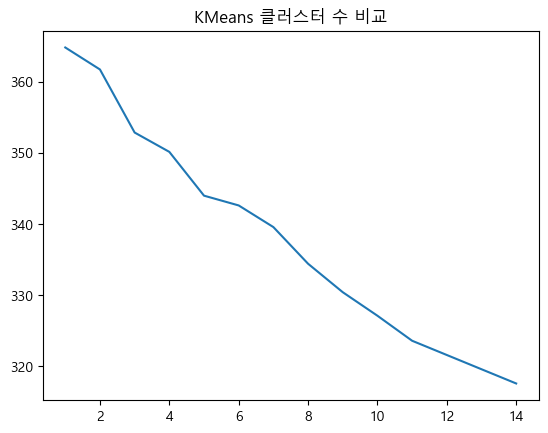

In [60]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 inertia 값을 넣어 그립니다.

plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [61]:
# n_clusters 에 적절한 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
n_clusters = 10
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["cluster"] = prediction

In [62]:
# 클러스터 센터
cc = cls.cluster_centers_

In [71]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(feature_tfidf)
X_tsne.shape

()

In [64]:
df2d = pd.DataFrame(X_tsne, columns=['x', 'y'])
df2d.shape

NameError: name 'X_tsne' is not defined

In [93]:
df2d["cluster"] = prediction
df2d.head()

,x,y,cluster
0,-352.873657,-170.971710,0
1,-69.444839,94.328384,0
2,-8.966678,-413.008331,0
3,318.607635,68.370934,0
4,148.779083,194.556396,0


/Users/jihyepark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

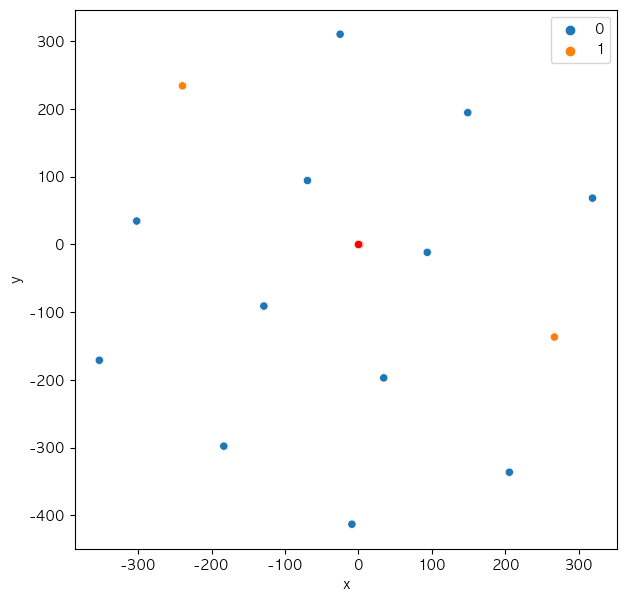

In [94]:
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df2d, x="x", y="y", hue="cluster")
sns.scatterplot(cc[:, 0], cc[:, 1],  color='red')


In [95]:
# df["cluster"] 의 빈도수를 value_counts로 세어봅니다.
df["cluster"].value_counts().head(10)

0    12
1     2
Name: cluster, dtype: int64

MiniBatchKMeans

In [96]:
# batch_size 를 쓸 수 있는 MiniBatchKMeans 로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# b_inertia 리스트에 cls.inertia_ 값을 넣어줍니다.
for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    b_inertia.append(cls.inertia_)


100%|██████████| 14/14 [00:00<00:00, 25.83it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

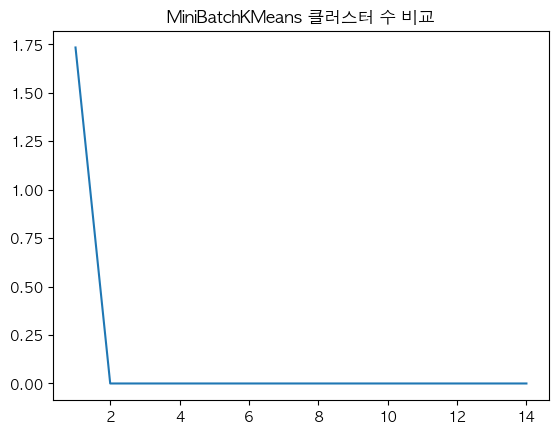

In [97]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 b_inertia 값을 넣어 그립니다.
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [98]:
# MiniBatchKMeans 를 통해 학습을 시킵니다.
# 결과를 bcluster 라는 변수에 저장합니다.
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["bcluster"] = prediction

In [99]:
# bcluster의 빈도수를 구합니다.
df["bcluster"].value_counts().head(10)

0    12
1     2
Name: bcluster, dtype: int64

In [101]:
# 어떤 댓글이 있는지 특정 클러스터의 값을 봅니다.  
df.loc[df["bcluster"] == 21, "comment"].value_counts().head(1)


Series([], Name: comment, dtype: int64)

In [103]:
# bcluster, cluster, course 값을 미리보기 합니다.
df.loc[df["bcluster"] == 21, ["bcluster", "cluster", "comment"]]

,bcluster,cluster,comment


In [107]:
df.loc[df["bcluster"] == 24, ["bcluster", "cluster", "origin_comment", "comment"]].tail(10)

,bcluster,cluster,origin_comment,comment


# 클러스터 예측 정확도 판별하기

In [109]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()
# 예측한 클러스터의 유니크 값
labels = np.unique(prediction)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(prediction==label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져옴
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means] 
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

/Users/jihyepark/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/jihyepark/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
1,후회가 마니 남네요 이좋은 추억송이라도 들으면서,1.0
0,후회가 마니 남네요 이좋은 추억송이라도 들으면서,0.0


In [111]:
#  score 정확도가 1이 나온 클러스터를 찾아봄 - 같은 단어끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 28, ["bcluster", "cluster", "origin_comment", "comment"]]

,bcluster,cluster,origin_comment,comment


In [114]:
# !pip install wordcloud

In [127]:
# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ["의", "입니다"]
# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기를 합니다.
# stopwords = []
# displayWordCloud 라는 함수를 만들어 재사용합니다.
from wordcloud import WordCloud


def displayWordCloud(data = None, backgroundcolor = 'black', width=1280, height=768):
    wordcloud = WordCloud(
                        # family='NanumBarunGothic',
                        font_path = '/Library/Fonts/AppleGothic.ttf',
                        # family="AppleGothic",
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

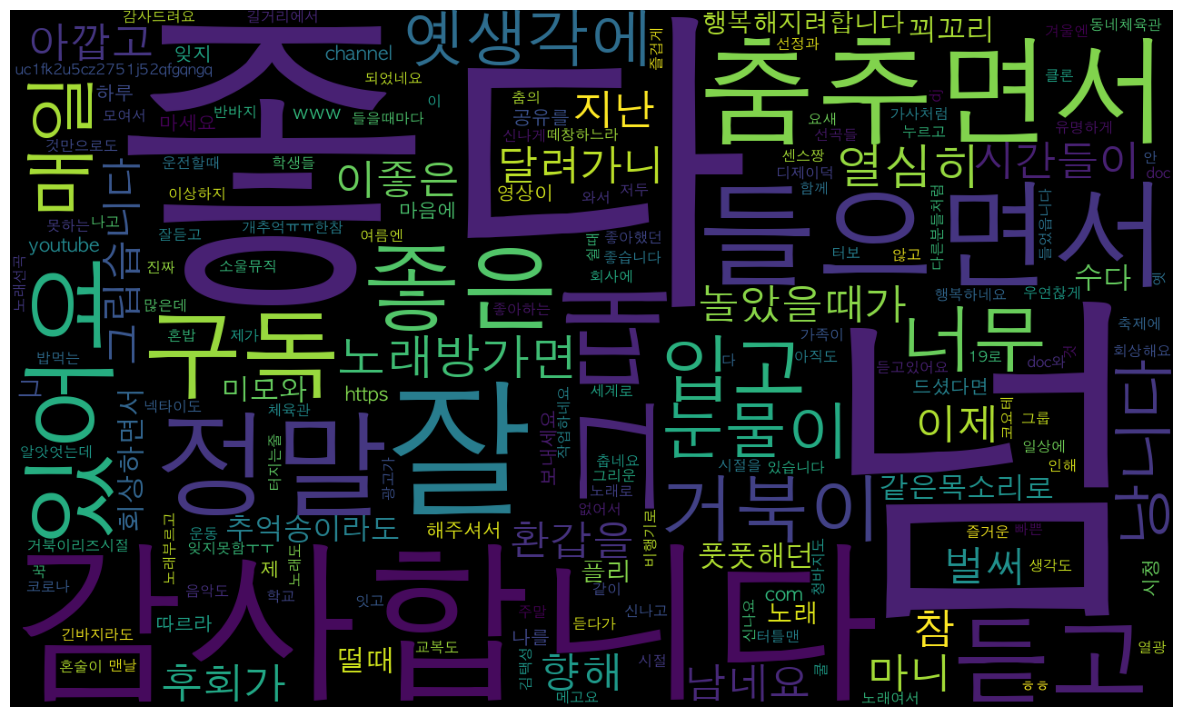

In [128]:
course_text = " ".join(df["comment"])
displayWordCloud(course_text)